# Imports and Data Setup:

In [1]:
# IMPORTS
import numpy as np
import pandas as pd
import os
import geoip2.database
import geoip2.errors
import geopy
from typing import Tuple

In [2]:
# CONSTS
GEOIP_PATH = os.path.join("db","GeoLite2-City_20240109","GeoLite2-City.mmdb")
SCAN_PATH = os.path.join("csvs","scan_2024-01-23_15-11.csv.gz")
ENR_SCAN_PATH = os.path.join("csvs","enriched_scan.csv.gz")
PLOT_PATH = "plots"
# INIT
os.makedirs(PLOT_PATH, exist_ok=True)
import df_logic
df_logic.init_geo(GEOIP_PATH)
import plots

In [3]:
# call to create enriched dataframe
df_logic.create_enriched_data(SCAN_PATH, ENR_SCAN_PATH, truncate=False)

enriched CSV file already exists


In [4]:
#tests
reader = geoip2.database.Reader("db/GeoLite2-City_20240109/GeoLite2-City.mmdb")
print(reader.city("142.250.195.206"))

geoip2.models.City({'continent': {'code': 'NA', 'geoname_id': 6255149, 'names': {'de': 'Nordamerika', 'en': 'North America', 'es': 'Norteamérica', 'fr': 'Amérique du Nord', 'ja': '北アメリカ', 'pt-BR': 'América do Norte', 'ru': 'Северная Америка', 'zh-CN': '北美洲'}}, 'country': {'geoname_id': 6252001, 'iso_code': 'US', 'names': {'de': 'USA', 'en': 'United States', 'es': 'Estados Unidos', 'fr': 'États Unis', 'ja': 'アメリカ', 'pt-BR': 'EUA', 'ru': 'США', 'zh-CN': '美国'}}, 'location': {'accuracy_radius': 1000, 'latitude': 37.751, 'longitude': -97.822, 'time_zone': 'America/Chicago'}, 'registered_country': {'geoname_id': 6252001, 'iso_code': 'US', 'names': {'de': 'USA', 'en': 'United States', 'es': 'Estados Unidos', 'fr': 'États Unis', 'ja': 'アメリカ', 'pt-BR': 'EUA', 'ru': 'США', 'zh-CN': '美国'}}, 'traits': {'ip_address': '142.250.195.206', 'prefix_len': 17}}, ['en'])


# Creation of Plots:

ValueError: Columns must be same length as key

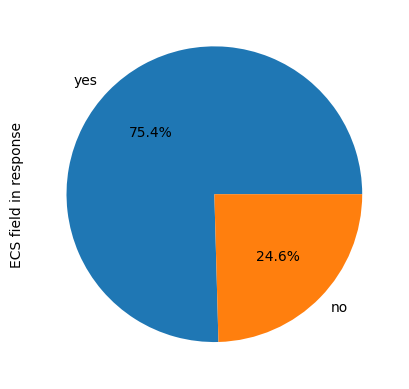

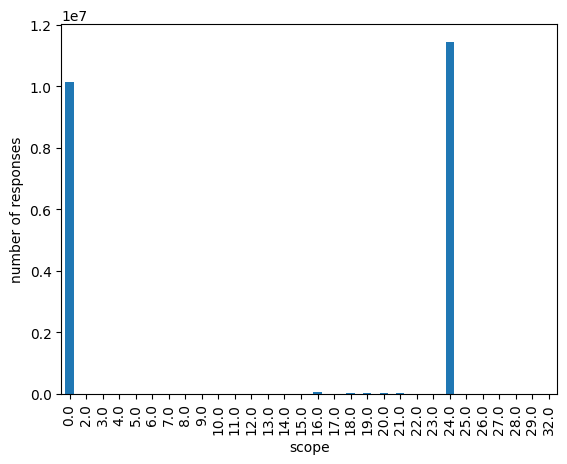

In [8]:
# the OGs~~~
df = df_logic.load_enriched_csv(ENR_SCAN_PATH, usecols=["returned-subnet"]) # this wont work with load_csv?
plots.plot_ecs_support_percentage(df, PLOT_PATH)
df = df_logic.load_enriched_csv(ENR_SCAN_PATH, usecols=["scope","timestamp"])
plots.plot_returned_scopes(df, PLOT_PATH)
df = df_logic.load_enriched_csv(ENR_SCAN_PATH, usecols=["subnet","scope"])
plots.plot_returned_scope_comparison(df, PLOT_PATH) #FIXME

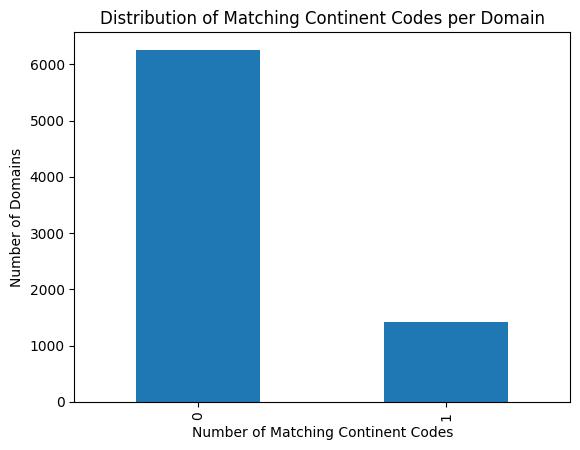

In [5]:
# continent distribution -> database too scuffed
df = df_logic.load_enriched_csv(os.path.join("csvs","enriched_scan_small.csv.gz"), usecols=["domain","scope","subnet-location","ip-locations"])
plots.plot_continent_distribution(df, PLOT_PATH)

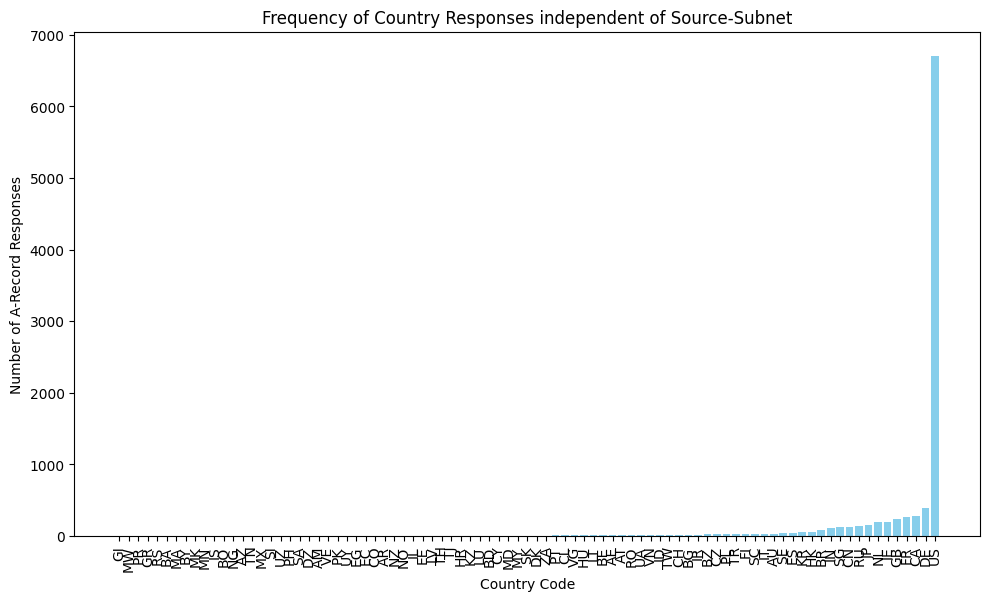

<Figure size 640x480 with 0 Axes>

In [6]:
# country mapping -> db prob also too whack
df = df_logic.load_enriched_csv(os.path.join("csvs","enriched_scan_small.csv.gz"), usecols=["domain","scope","subnet-location","ip-locations"])
plots.plot_country_responses(df, PLOT_PATH)

おやすみ～～～